In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [4]:
import cupy as cp

In [5]:
PROJECT_PATH = '../'
DATA_DIR = "/home/swei20/LV/data/"
PCA_PATH = '/scratch/ceph/dobos/data/pfsspec/import/stellar/rbf/bosz_5000_full/pca/spectra.h5'
NORM_PATH = "/scratch/ceph/szalay/swei20/AE/norm_flux_step4.h5"
sys.path.insert(0, PROJECT_PATH)

### Load data

In [6]:
with h5py.File(NORM_PATH, 'r') as f:
    flux0 = f['flux'][()]
    para0 = f['para'][()]
    wave0 = f['wave'][()]

In [7]:
flux0.shape, wave0.shape

((116614, 3850), (3850,))

In [8]:
from lv.base.dataloader_c import DataLoader

In [9]:
ds = DataLoader()

In [10]:
ds.prepare_data (flux0, wave0, para0, "T56", "M", fix_CO=0)

Cupy flux: 15398, wave: 949


# find masking 

In [11]:
u,w,v = ds._svd(ds.flux)

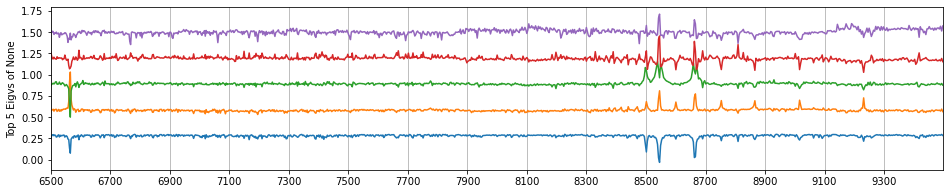

In [12]:
ds.plot_eigv(cp.asnumpy(v))

In [13]:
k,q,prom = 100, 0.6, 0.2
nvv= ds.get_peaks(k=k,q=q,prom=prom, out=1)

Text(0.5, 1.0, 'k=100, q=0.6, prom=0.2')

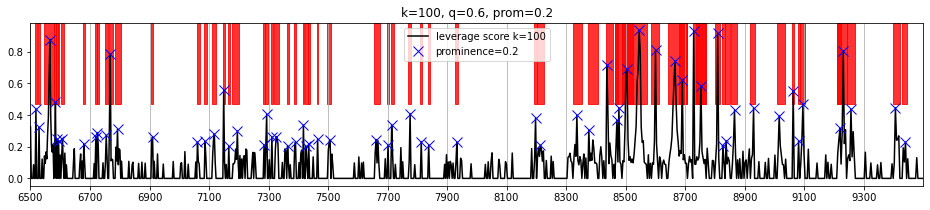

In [14]:
ds.plot_peaks(nvv, k, prom)
plt.title(f"k={k}, q={q}, prom={prom}")

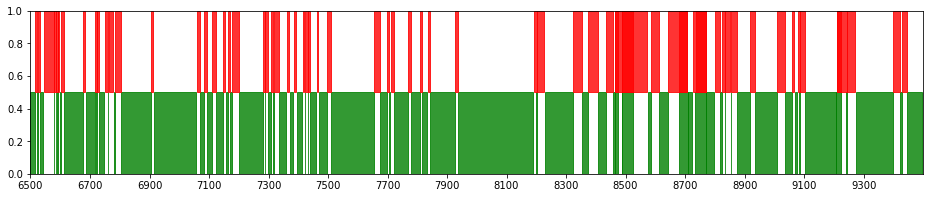

In [15]:
ds.plot_MN_mask()

In [16]:
ds.get_MN(ds.mask, top=5)

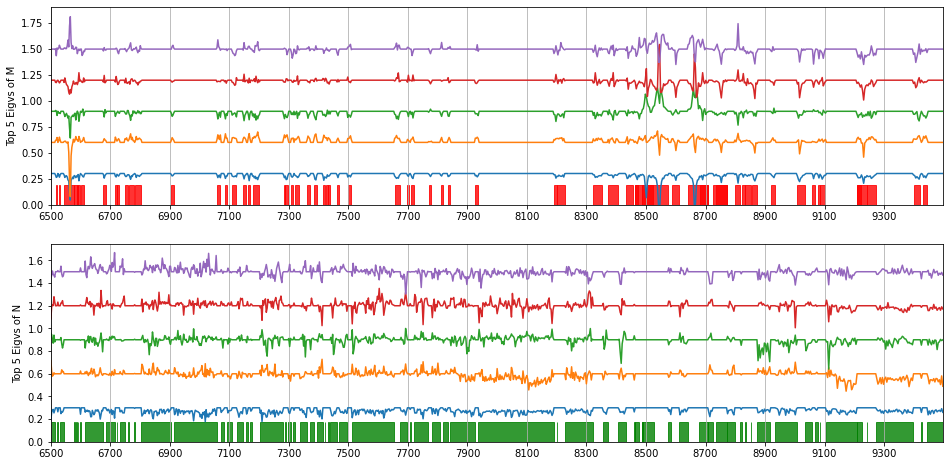

In [17]:
f, axs = plt.subplots(2,1,figsize=(16,8))
ds.plot_MN(step=0.3, axs=axs)

In [ ]:
ML, MS, MLv, MSv = ds._pcp(ds.M, delta=1e-6, mu=None, lam=None, norm=None, maxiter=1000)

16.778008 0.008058752952891317 41701.117


In [ ]:
f, axs = plt.subplots(2,1,figsize=(16,8), facecolor="w")
ds.plot_eigv(MLv, name="ML", ax=axs[0])
ds.plot_eigv(MSv, name="MS", ax=axs[1])

In [ ]:
NL, NS, NLv, NSv = ds._pcp(ds.N, delta=1e-6, mu=None, lam=None, norm=None, maxiter=1000)

In [ ]:
f, axs = plt.subplots(2,1,figsize=(16,8), facecolor="w")
ds.plot_eigv(NLv, name="NL", ax=axs[0])
ds.plot_eigv(NSv, name="NS", ax=axs[1])

In [ ]:
ds.pcp_transform(MLv, MSv, NLv, NSv)

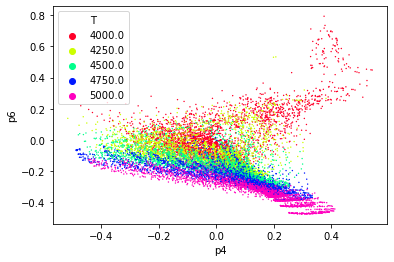

In [321]:
ds.p(4,6,"T")

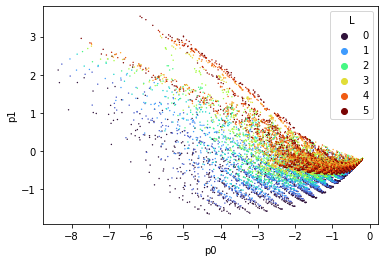

In [322]:
ds.p(0,1,"L")

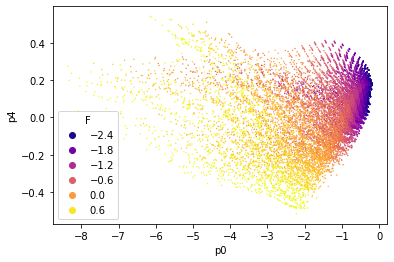

In [323]:
ds.p(0,4,"F")

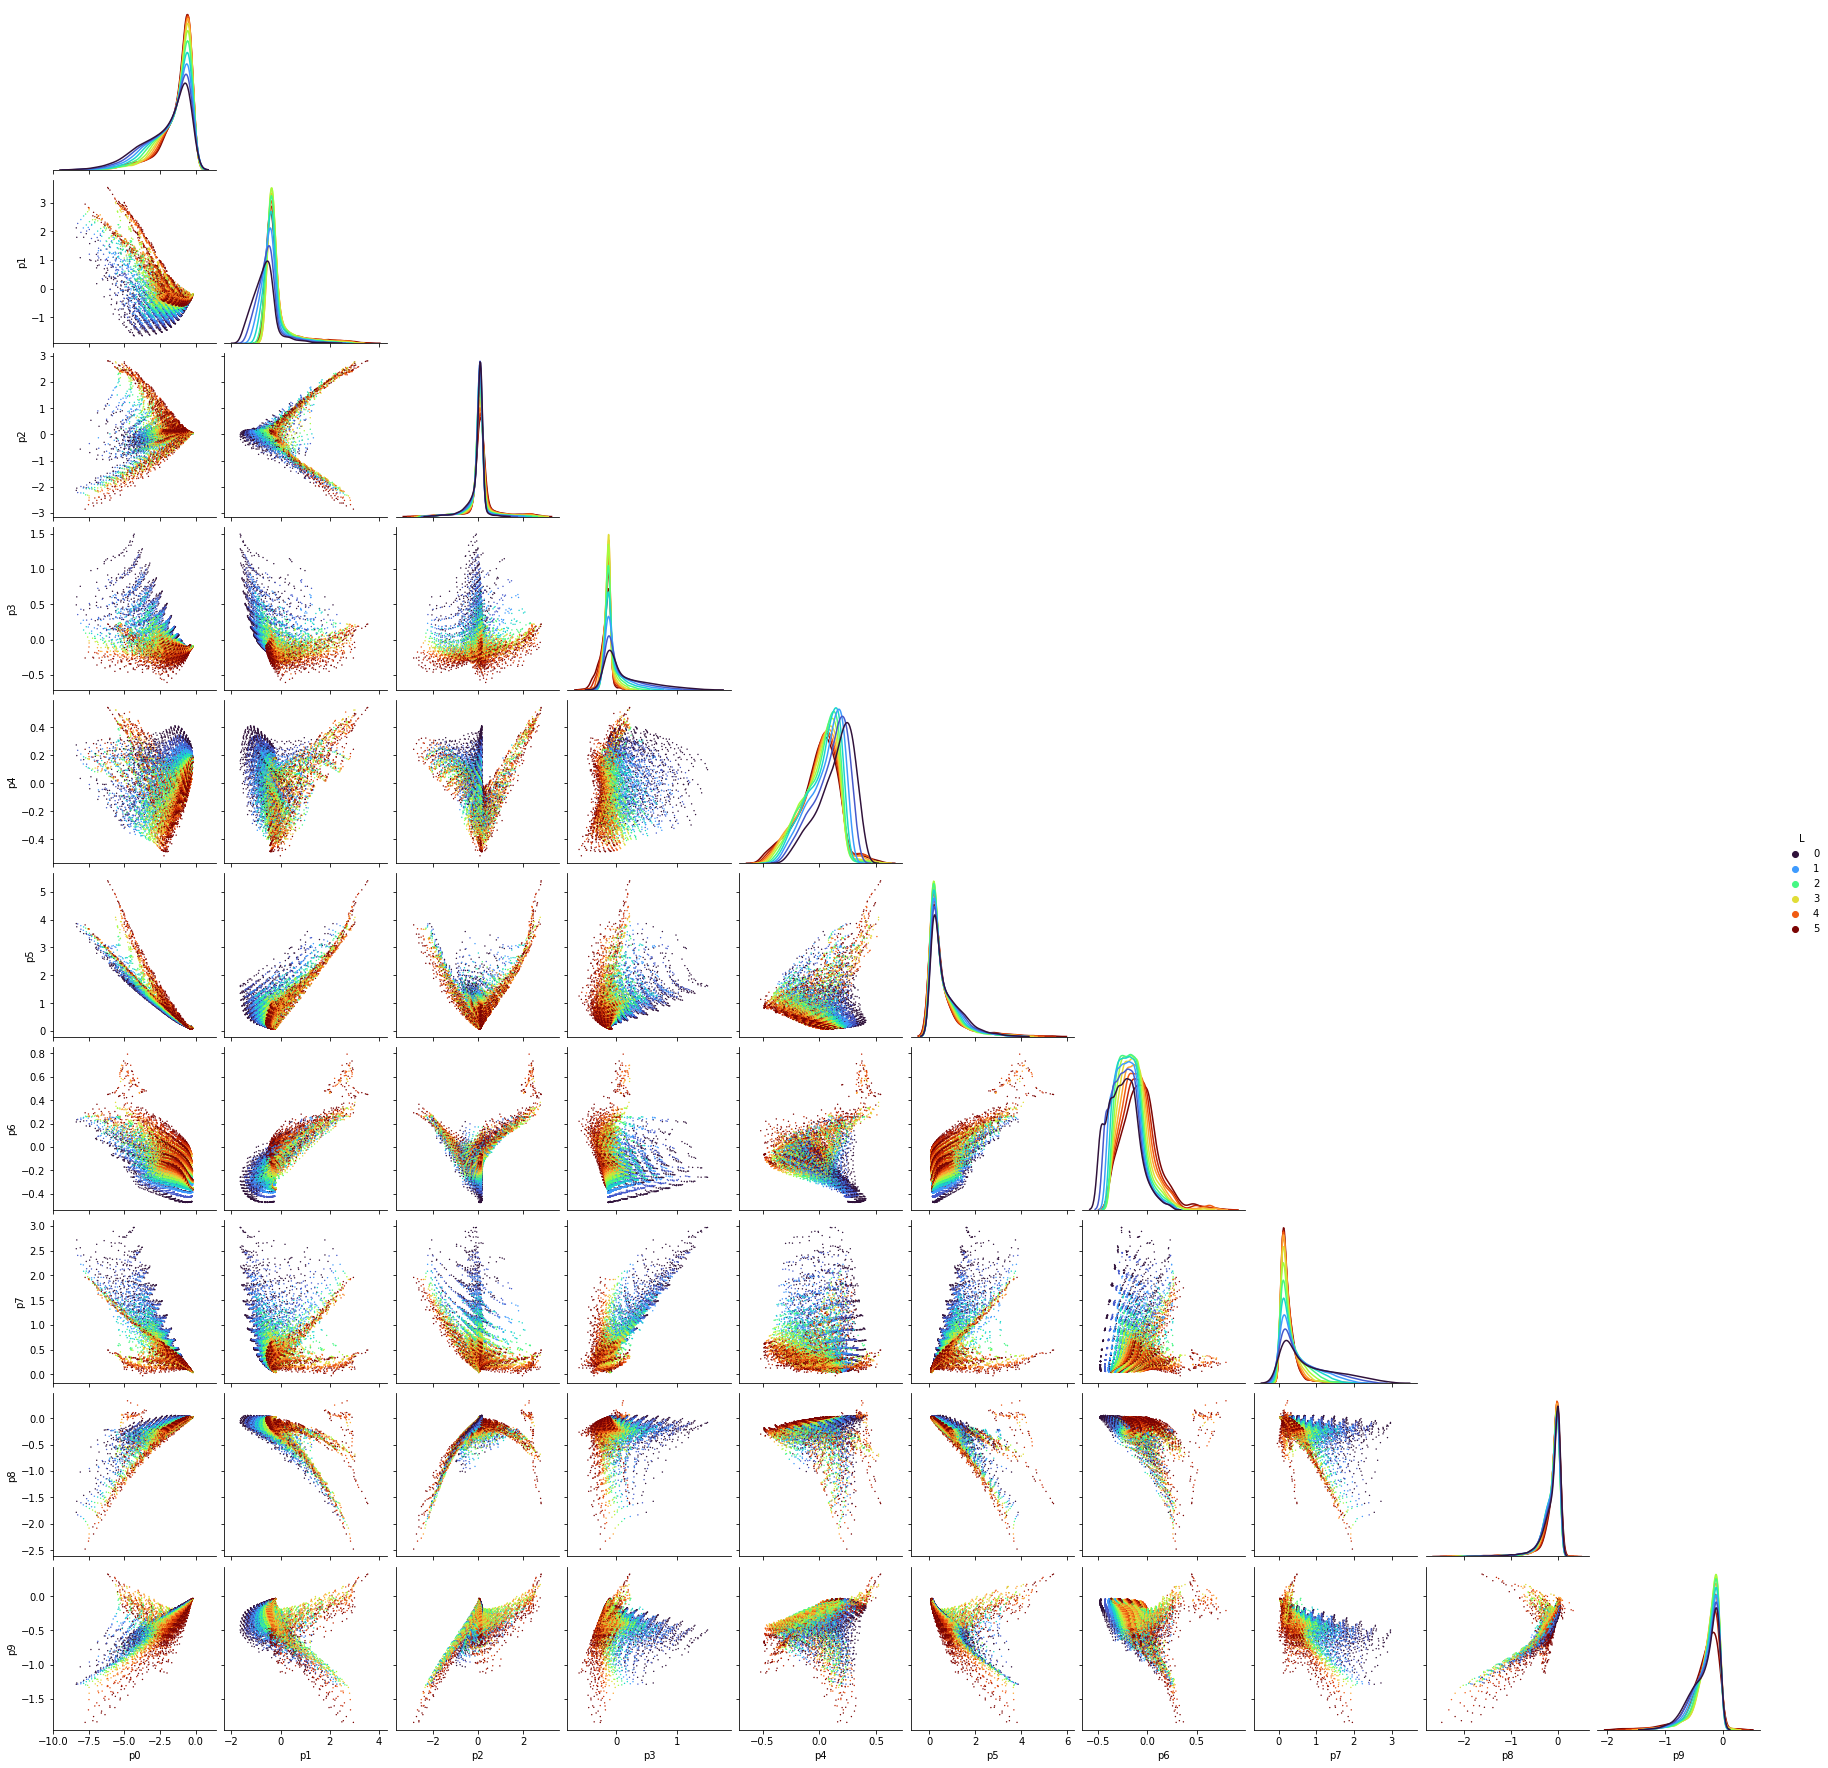

In [297]:
sns.pairplot(
    df,
    x_vars=[f"p{i}" for i in range(10)],
    y_vars=[f"p{i}" for i in range(10)],
    hue="L",
    plot_kws=dict(marker="o", s=2, edgecolor="none"),
    diag_kws=dict(fill=False),
    palette="turbo",
    corner=True
)

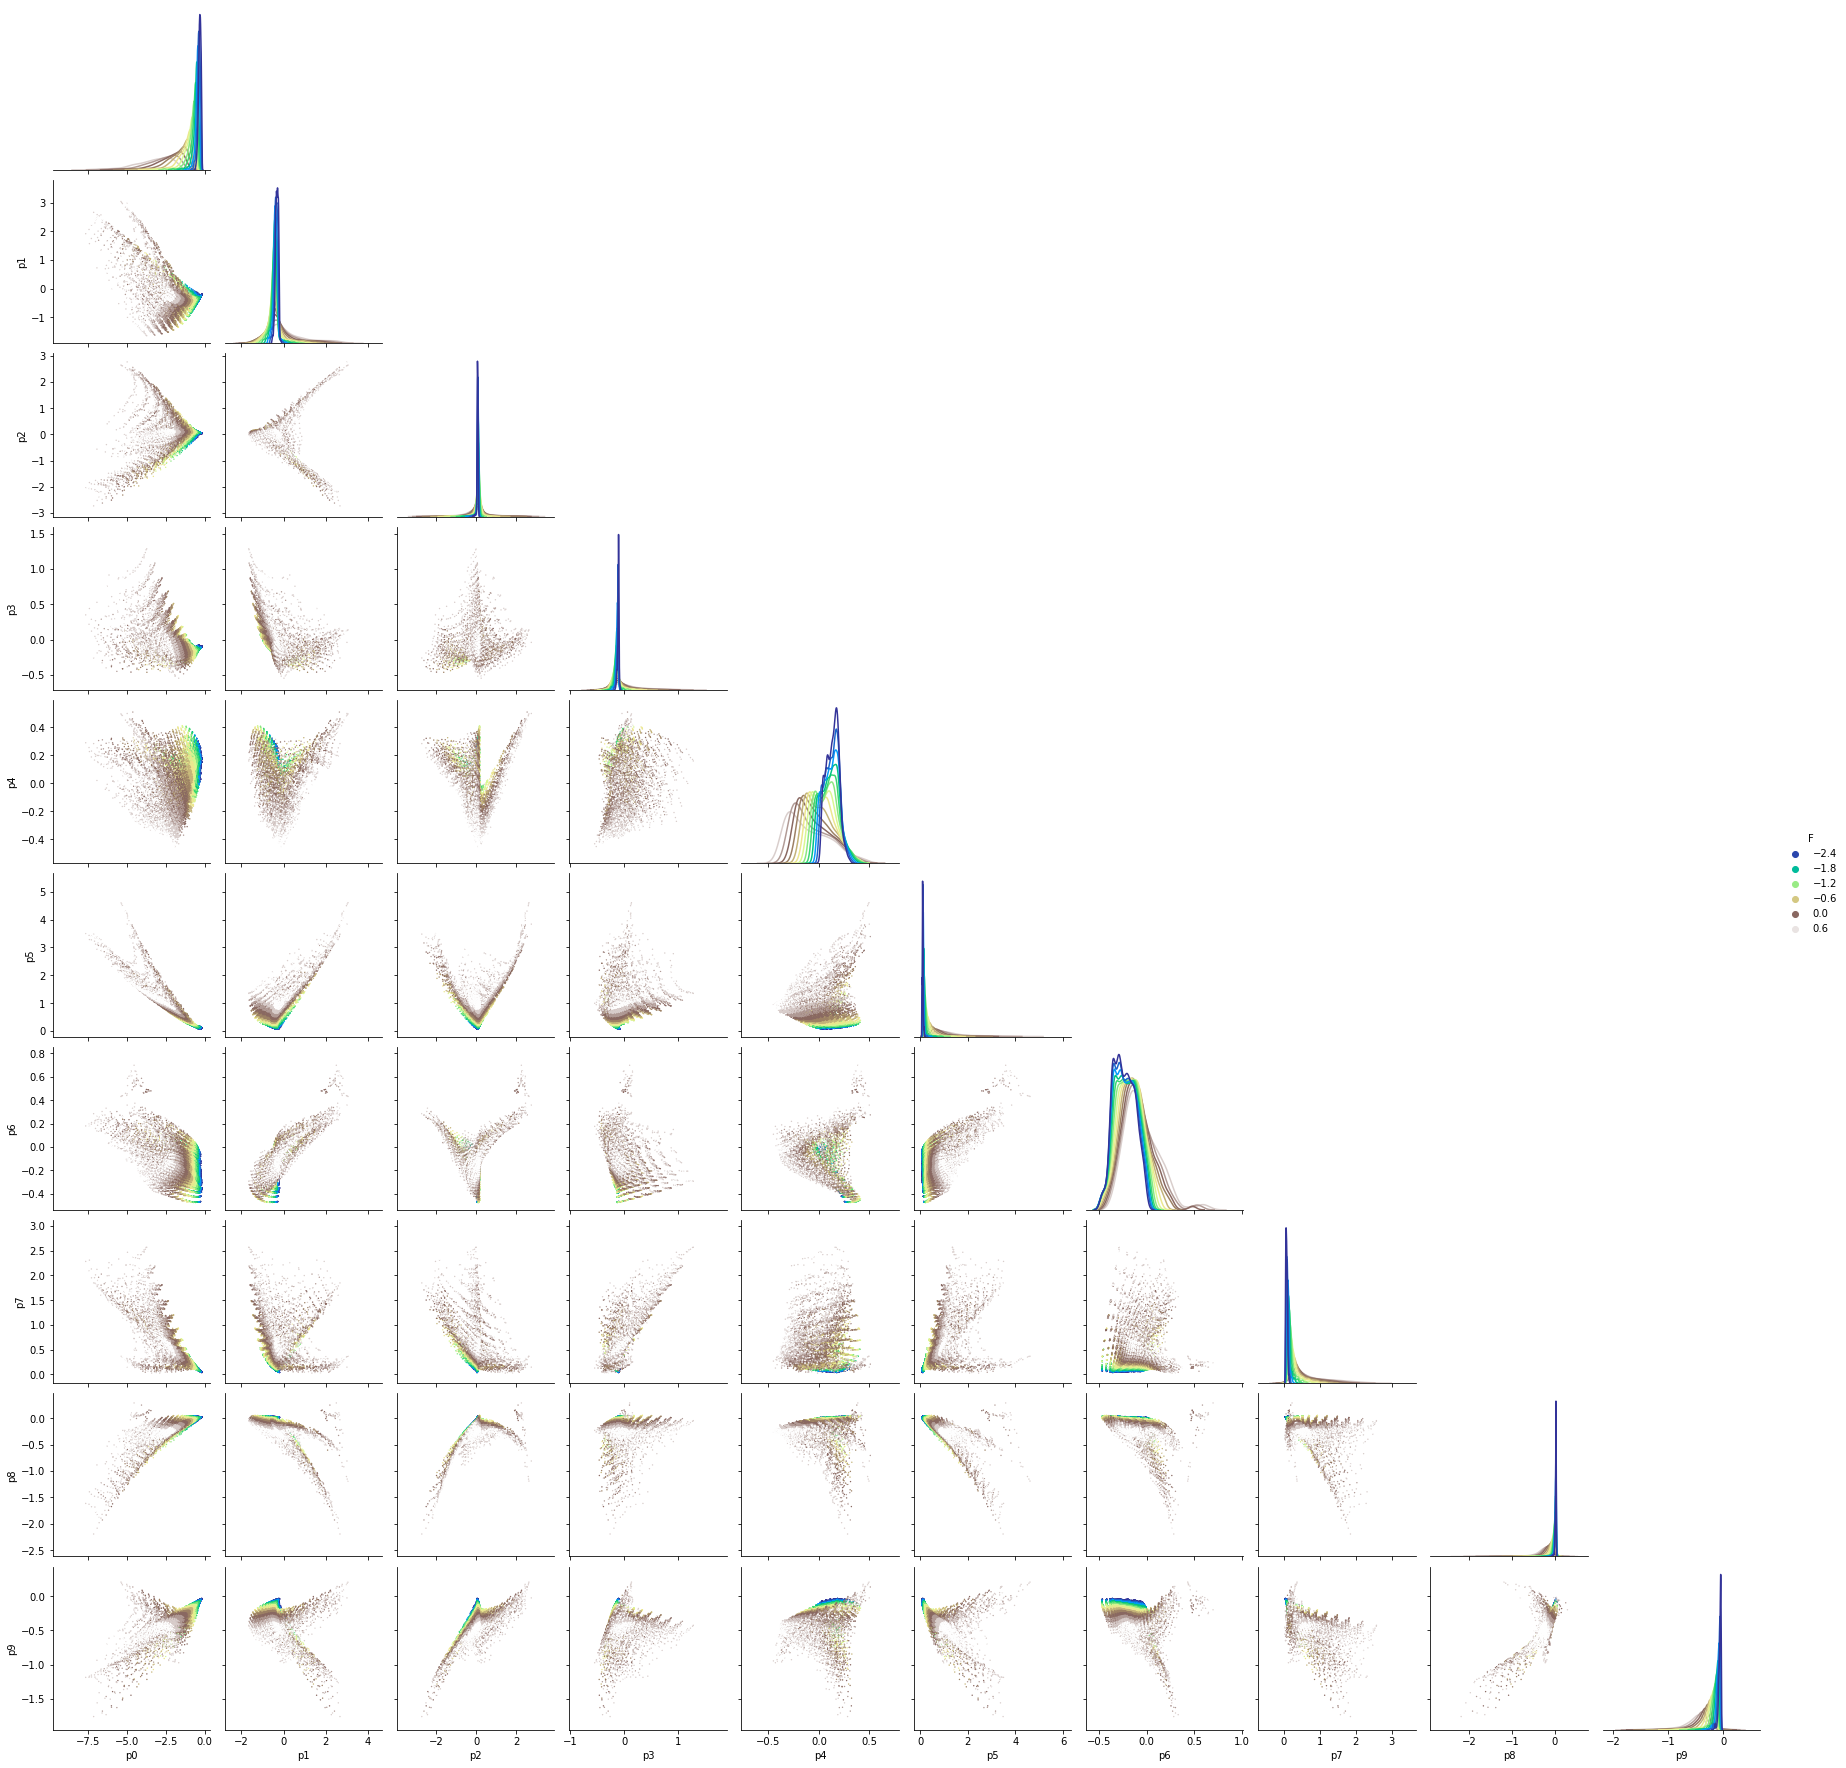

In [298]:
sns.pairplot(
    df,
    x_vars=[f"p{i}" for i in range(10)],
    y_vars=[f"p{i}" for i in range(10)],
    hue="F",
    plot_kws=dict(marker="o", s=2, edgecolor="none"),
    diag_kws=dict(fill=False),
    palette="terrain",
    corner=True
)